   max_depth  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0        NaN      0.970724     0.836182      242.06543   1338.424835
1        3.0      0.970724     0.836182      242.06543   1338.424835
2        5.0      0.970724     0.836182      242.06543   1338.424835
3        7.0      0.970724     0.836182      242.06543   1338.424835
4        9.0      0.970724     0.836182      242.06543   1338.424835


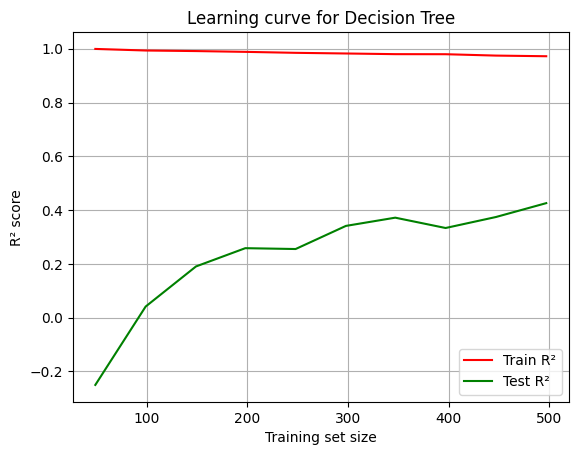

'\nfor s in samples_to_split:\n    # Train our model with the training data\n    regressor = DecisionTreeRegressor(random_state=0, min_samples_split=s)\n\n    # Set up 10-fold cross-validation\n    kf = KFold(n_splits=10, shuffle=True, random_state=0)\n    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)\n\n    # Store results in a dict\n    results_list_split.append({\n        "min_samples_split": s,\n        "Avg Train R2": results[\'train_r2\'].mean(),\n        "Avg Test R2": results[\'test_r2\'].mean(),\n        "Avg Train MSE": -results[\'train_mse\'].mean(),   # convert to positive\n        "Avg Test MSE": -results[\'test_mse\'].mean()\n    })\n\n# Create the DataFrame\nresults_split_df = pd.DataFrame(results_list_split)\nprint(results_split_df)\n\n#Now combine them\n\nresults_list_total = []\n\nfor d in depth:\n    for s in samples_to_split:\n        # Train our model with the training data\n        regressor = Decision

In [5]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']
# print(X_training)
# print(Y_training)


# Scatter plot: of every line
"""
plot_training = X_training.rename(columns={
    'normalising_temperature': 'normalising temp',
    'tempering_temperature': 'tempering temp',
    'percent_silicon': '% silicon',
    'percent_chromium': '% chromium',
    'percent_copper': '% copper',
    'percent_nickel': '% nickel',
    'percent_sulphur': '% sulphur',
    'percent_carbon': '% carbon',
    'percent_manganese': '% manganese',
})

pd.plotting.scatter_matrix(
    plot_training[['normalising temp', 'tempering temp', '% silicon', 
                '% chromium', '% copper', '% nickel', 
                '% sulphur', '% carbon', '% manganese']],
    figsize=(20, 20),
    diagonal='kde'   # histogram or kde on the diagonal
)
plt.savefig("scatter_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
"""

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

# List to collect results
results_list = []
results_list_split = []

depth = [None, 3, 5, 7, 9]
samples_to_split = [2,3,4,5,6]

for d in depth:
    # Train our model with the training data
    regressor = DecisionTreeRegressor(random_state=0, max_depth=d)
    
    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list.append({
        "max_depth": d,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)

for s in samples_to_split:
    # Train our model with the training data
    regressor = DecisionTreeRegressor(random_state=0, min_samples_split=s)
    
    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list_split.append({
        "min_samples_split": s,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_split_df = pd.DataFrame(results_list_split)
print(results_split_df)

#Now combine them

results_list_total = []

for d in depth:
    for s in samples_to_split:
        # Train our model with the training data
        regressor = DecisionTreeRegressor(random_state=0, max_depth=d, min_samples_split=s)
        
        # Set up 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
        
        # Store results in a dict
        results_list_total.append({
            "max_depth": d,
            "min_split": s,
            "Avg Train R2": round(results['train_r2'].mean(),3),
            "Avg Test R2": round(results['test_r2'].mean(),3),
            "Avg Train MSE": round(-results['train_mse'].mean(),3),   # convert to positive
            "Avg Test MSE": round(-results['test_mse'].mean(),3)
        })

# Create the DataFrame
results_total = pd.DataFrame(results_list_total)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(results_total)

In [48]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold, cross_validate
from sklearn.gaussian_process.kernels import RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

# List to collect results
results_list = []
results_list_alpha = []

#Default kernel (None) uses RBF

kernels = [
    # RBF
    None,

]
alpha = [0.00001, 0.1, 1, 10, 100]

for k in kernels:
    # Train our model with the training data
    regressor = GaussianProcessRegressor(random_state=0, kernel=k)

    #If you remove model and put in regressor instead u get what happens with no normalization
    model = make_pipeline(StandardScaler(), regressor)

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list.append({
        "Kernel": k,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)
"""
for a in alpha:
     # Train our model with the training data
    regressor = GaussianProcessRegressor(random_state=0, alpha=a)
    
    model = make_pipeline(StandardScaler(), regressor)

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list_alpha.append({
        "Alpha": a,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_alpha_df = pd.DataFrame(results_list_alpha)
print(results_alpha_df)

#Now combine them

results_list_total = []

for k in kernels:
    for a in alpha:
        # Train our model with the training data
        regressor = GaussianProcessRegressor(random_state=0, alpha=a, kernel=k)
        
        model = make_pipeline(StandardScaler(), regressor)
    
        # Set up 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
        
        # Store results in a dict
        results_list_total.append({
            "Kernel": k,
            "Alpha": a,
            "Avg Train R2": results['train_r2'].mean(),
            "Avg Test R2": results['test_r2'].mean(),
            "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
            "Avg Test MSE": -results['test_mse'].mean()
        })

# Create the DataFrame
results_total = pd.DataFrame(results_list_total)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(results_list_total)
"""

  Kernel  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0   None           1.0    -0.557285   5.519898e-07  12686.100059


'\nfor a in alpha:\n     # Train our model with the training data\n    regressor = GaussianProcessRegressor(random_state=0, alpha=a)\n\n    model = make_pipeline(StandardScaler(), regressor)\n\n    # Set up 10-fold cross-validation\n    kf = KFold(n_splits=10, shuffle=True, random_state=0)\n    results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)\n\n    # Store results in a dict\n    results_list_alpha.append({\n        "Alpha": a,\n        "Avg Train R2": results[\'train_r2\'].mean(),\n        "Avg Test R2": results[\'test_r2\'].mean(),\n        "Avg Train MSE": -results[\'train_mse\'].mean(),   # convert to positive\n        "Avg Test MSE": -results[\'test_mse\'].mean()\n    })\n\n# Create the DataFrame\nresults_alpha_df = pd.DataFrame(results_list_alpha)\nprint(results_alpha_df)\n\n#Now combine them\n\nresults_list_total = []\n\nfor k in kernels:\n    for a in alpha:\n        # Train our model with the training data\n        regres

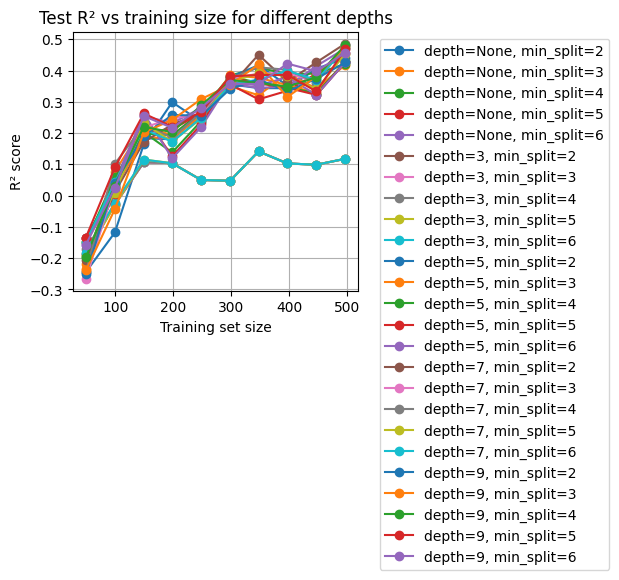

In [15]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']
# print(X_training)
# print(Y_training)

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

depth = [None, 3, 5, 7, 9]
samples_to_split = [2,3,4,5,6]

for d in depth:
    for s in samples_to_split:
        # Train our model with the training data
        regressor = DecisionTreeRegressor(random_state=0, max_depth=d, min_samples_split=s)
        
        train_sizes, train_scores, test_scores = learning_curve(
        regressor,
        X_training,
        Y_training,
        cv=10,
        scoring="r2",        # or "neg_mean_squared_error"
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=0)

        
        test_mean = test_scores.mean(axis=1)
        label = f"depth={d}, min_split={s}"
        plt.plot(train_sizes, test_mean, marker='o', label=label)
        

plt.xlabel("Training set size")
plt.ylabel("R² score")
plt.title("Test R² vs training size for different depths")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()